In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Likelihood(x,mu,std):
    return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mu)**2/(2*std**2))

In [3]:
mu = 0.3
sigma = 1.5

In [4]:
t = np.linspace(-4,4,20)
Like = Likelihood(t,mu,sigma)

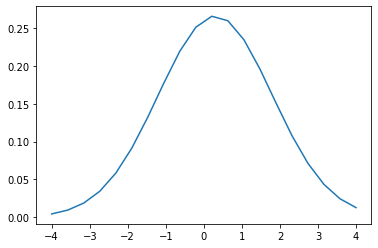

In [5]:
plt.plot(t,Like)

In [15]:
def Metropolis(Likelihood, mu_, sigma_, seed_=0., delta=1.0, N = int(1e3)):
    
    x = np.zeros(N)
    
    x[0] = seed_
    
    
    for i in range(1,N-1):
        
        # futuro ----- # present
        xn = x[i] + np.random.uniform(-delta,delta)
        
        alpha = np.minimum(1 , Likelihood(xn,mu_,sigma_)/Likelihood(x[i],mu_,sigma_) )
    
        g = np.random.rand()
        
        if g < alpha:
            x[i+1] = xn
        else:
            x[i+1] = x[i]
        
    
      #  print(alpha)
    return x

In [17]:
x = Metropolis(Likelihood,mu,sigma)

(array([0.00881275, 0.0176255 , 0.02154228, 0.07343958, 0.18604694,
        0.24773619, 0.18702613, 0.12631608, 0.07343958, 0.03720939]),
 array([-6.2003126 , -5.17906495, -4.1578173 , -3.13656965, -2.115322  ,
        -1.09407434, -0.07282669,  0.94842096,  1.96966861,  2.99091626,
         4.01216391]),
 <BarContainer object of 10 artists>)

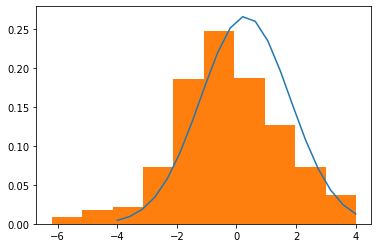

In [18]:
plt.plot(t,Like)
plt.hist(x,density=True)